# Chi-cuadrado: interpretacion y calculo

In [12]:
# imports usuales

import numpy as np
import matplotlib.pyplot as plt

In [13]:
# un import nuevo

from scipy.stats import chi2

In [14]:
# estilos para los graficos

from matplotlib import style
plt.style.use('seaborn')
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.ion()
%matplotlib inline
%config InlineBackend.figure_format='retina'

<ipython-input-14-f0fe1905a273>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [15]:
# 10 variables independientes con distribucion N(0,1) 
# (de cada una de ellas tenemos 10000 muestras individuales)

p = np.random.randn(10000)
q = np.random.randn(10000)
r = np.random.randn(10000)
s = np.random.randn(10000)
t = np.random.randn(10000)
u = np.random.randn(10000)
v = np.random.randn(10000)
w = np.random.randn(10000)
x = np.random.randn(10000)
y = np.random.randn(10000)

In [17]:
# formamos las variables derivadas de ellas
# (hay formas mas elegantes, pero esta es didactica por ser transparente!)

Z1  = p**2
Z2  = p**2 + q**2
Z3  = p**2 + q**2 + r**2
Z4  = p**2 + q**2 + r**2 + s**2
Z5  = p**2 + q**2 + r**2 + s**2 + t**2
Z6  = p**2 + q**2 + r**2 + s**2 + t**2 + u**2
Z7  = p**2 + q**2 + r**2 + s**2 + t**2 + u**2 + v**2
Z8  = p**2 + q**2 + r**2 + s**2 + t**2 + u**2 + v**2 + w**2
Z9  = p**2 + q**2 + r**2 + s**2 + t**2 + u**2 + v**2 + w**2 + x**2
Z10 = p**2 + q**2 + r**2 + s**2 + t**2 + u**2 + v**2 + w**2 + x**2 + y**2

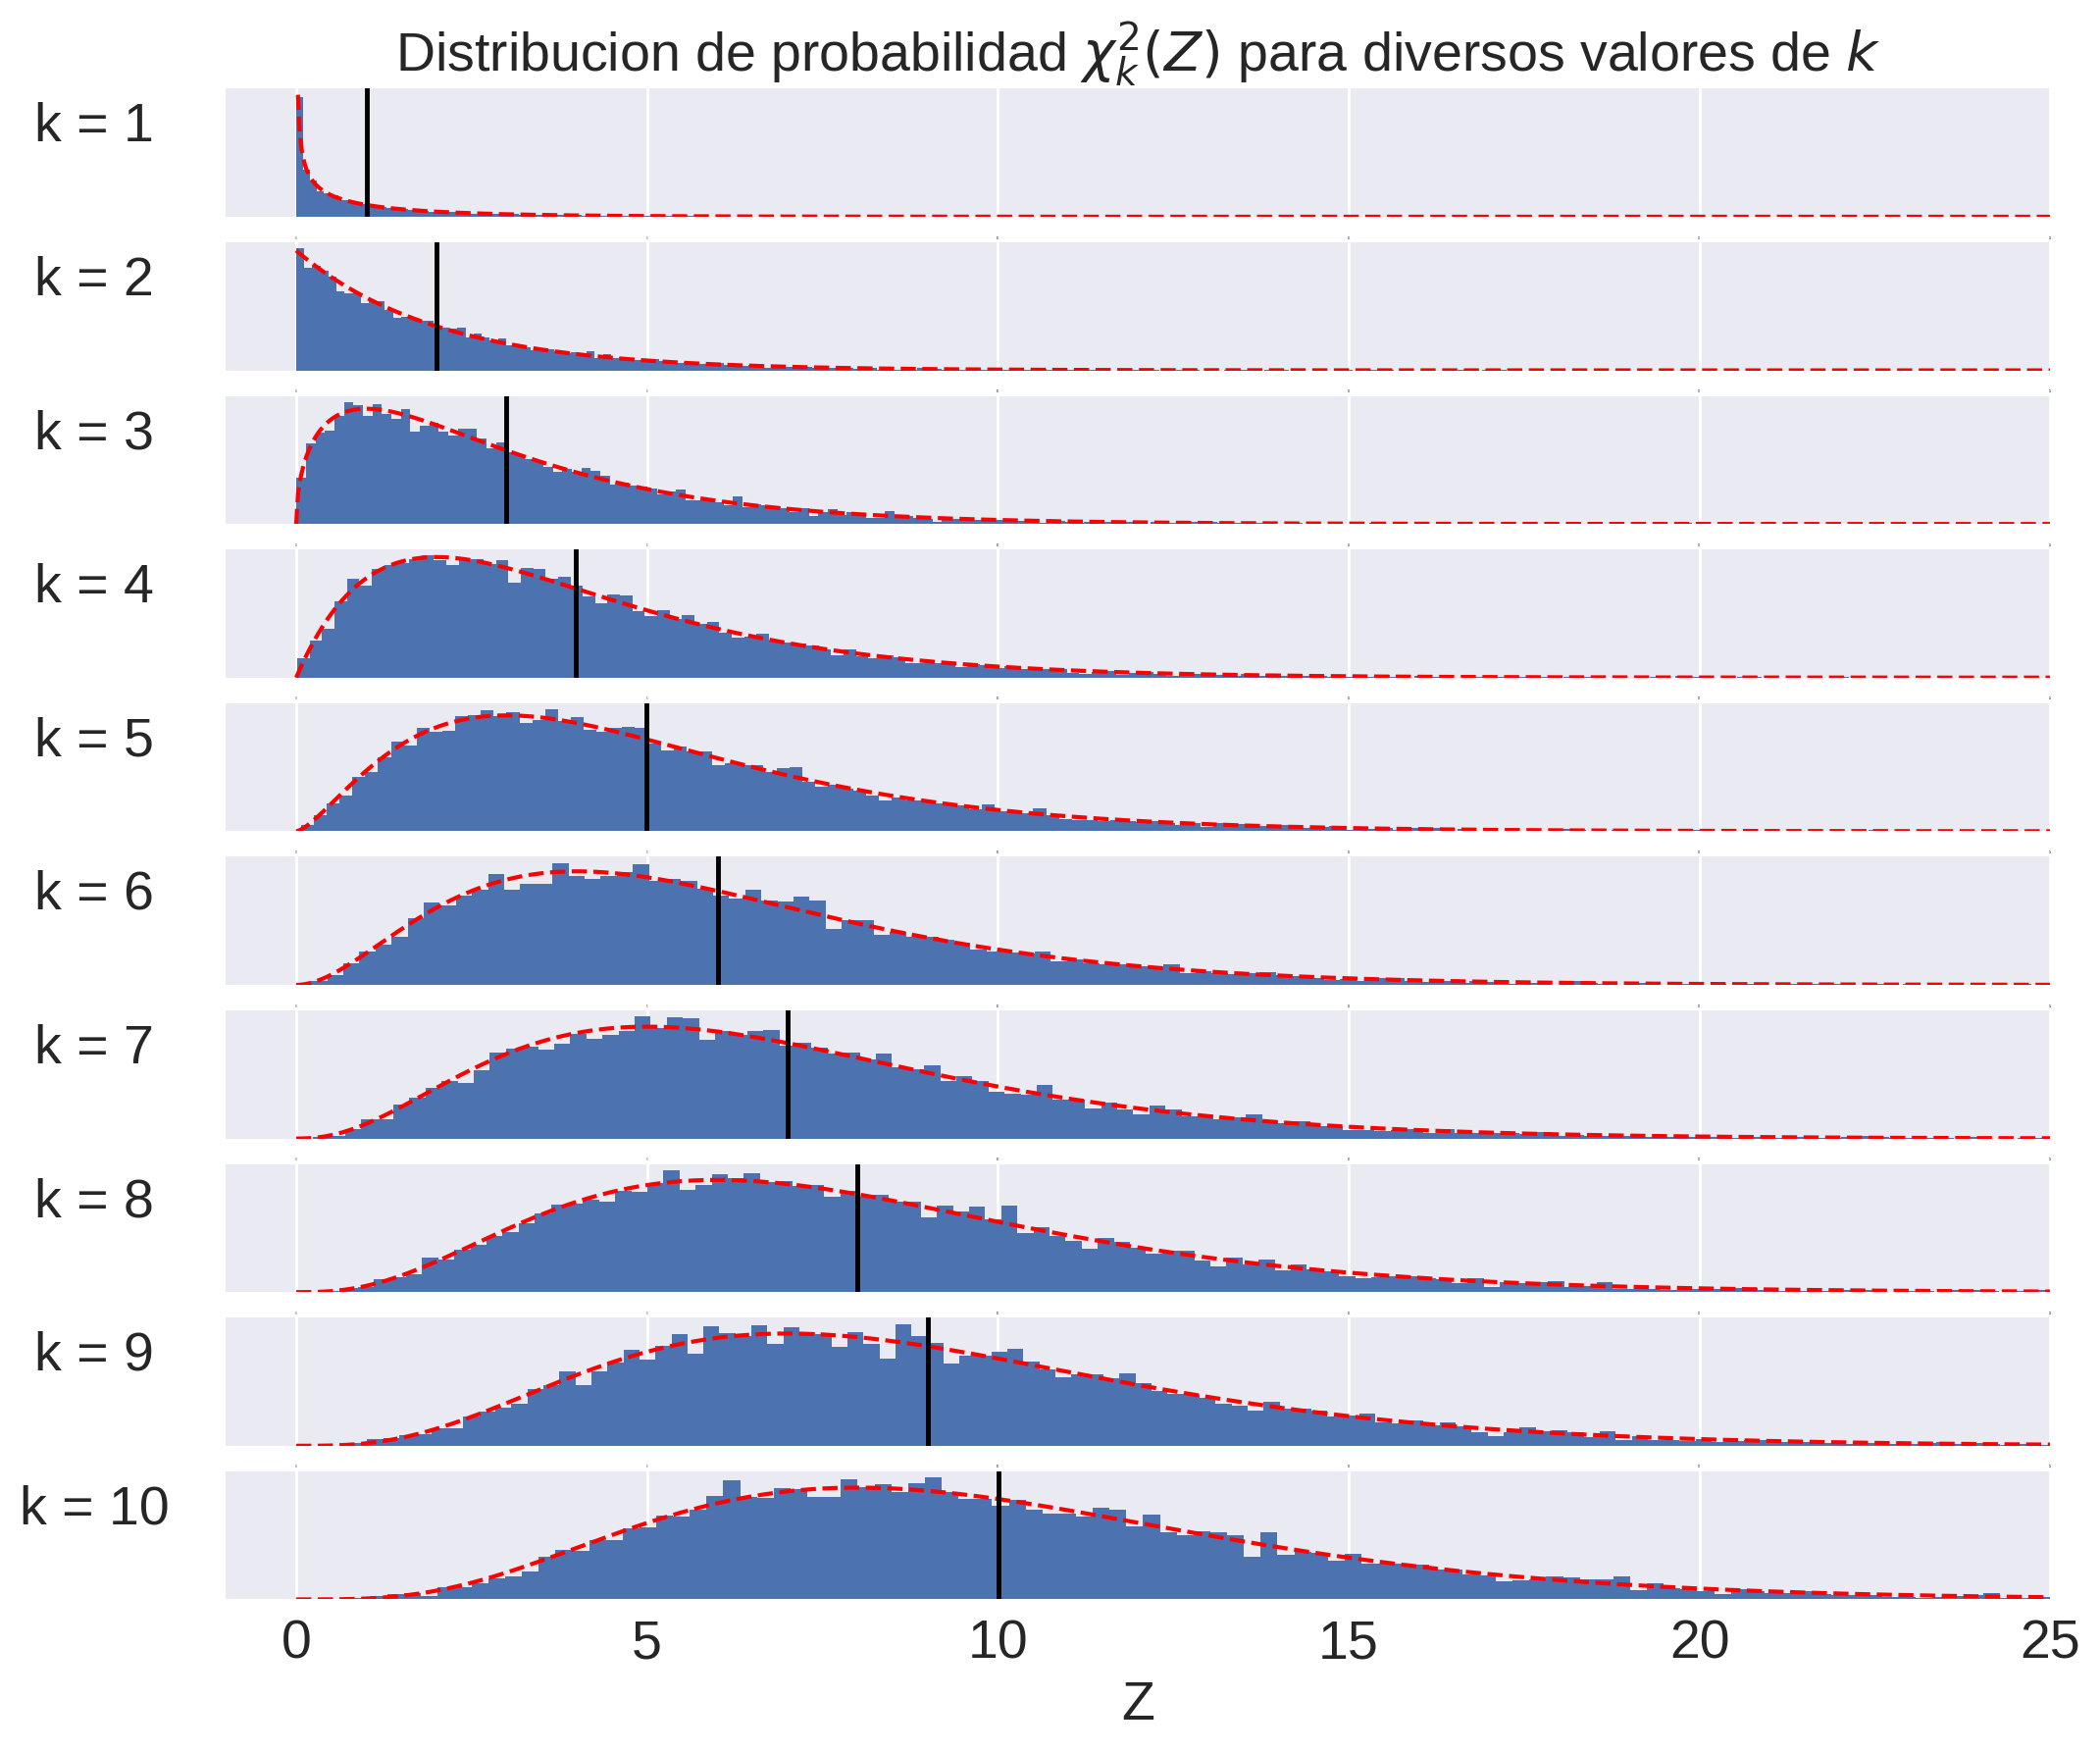

In [18]:
# grafiquemos lo obtenido para las distribuciones de probabilidad

fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(12,10))
for i in range(1, 11):
    axs[i-1].hist( eval( 'Z' + str(i) ), bins=150, density=True)
    axs[i-1].set_ylabel('k = {}                '.format(i), rotation=0)
    axs[i-1].get_yaxis().set_ticks([])
    axs[i-1].get_xaxis().set_ticks([])
    axs[i-1].get_xaxis().set_ticks(np.arange(0,26, step=5))
    axs[i-1].xaxis.set_tick_params(labelsize=0)
    # graficar ademas la distribucion teorica
    xrange = np.linspace(0, 25, num=1000)
    axs[i-1].plot(xrange, chi2.pdf(xrange, df=i), 'r--', linewidth=1.5)
    axs[i-1].axvline(np.mean( eval('Z' + str(i)) ), color='k')


plt.setp(axs, xlim=(-1,25))
axs[-1].set_xlabel('Z')
axs[-1].xaxis.set_tick_params(labelsize=20)
axs[-1].set_xticks(np.arange(0, 25), minor=True)
axs[0].set_title(r'Distribucion de probabilidad $\chi^2_k(Z)$ para diversos valores de $k$');



# Tabla de valores de chi2 y p-values

Fuente: Wikipedia, Chi-square distribution.

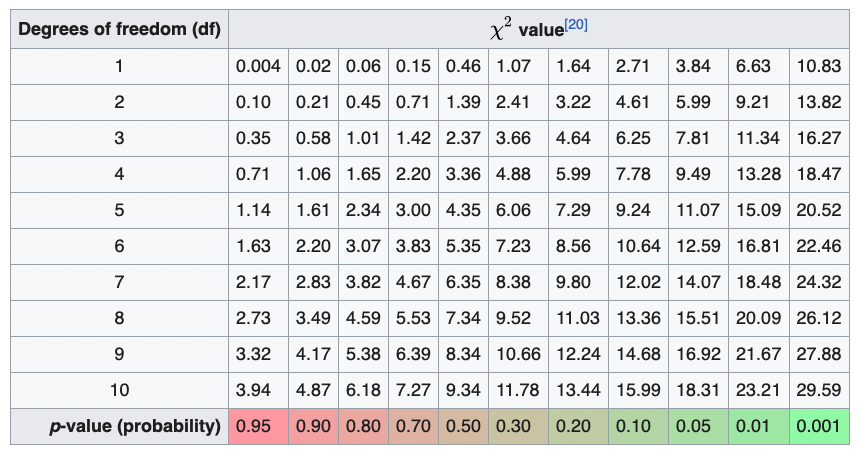

## Como calcular el p-value asociado a un valor de chi-cuadrado?

In [7]:
from scipy.stats.distributions import chi2

In [20]:
chi2.sf(10,4)

0.04042768199451279

In [9]:
# tambien:
1 - chi2.cdf(0.004, 1)

0.9495709711511051

In [10]:
chi2.sf(29.59,10)

0.0009993620119330144

In [11]:
# tambien:
1 - chi2.cdf(29.59, 10)

0.0009993620119330693

# Acerca del p-value

Si es conocida la distribución que describe con qué probabilidad se obtienen, es posible calcular qué tan habitual es obtener el $\chi^2$ que obtuvimos en este ajuste en particular: se le llama "p-valor" a la probabilidad de haber obtenido ese $\chi^2$ o uno peor, si el modelo elegido es el correcto.

Formalmente, el p-valor es la probabilidad de que un valor estadístico sea posible si se da por cierta una hipótesis (a la que se le llama hipótesis nula). En nuestro caso el estadístico es el $\chi^2$, y la hipótesis nula es que el modelo elegido para ajustar es el que describe correctamente el fenómeno observado. Entonces, podemos decir que:

- Si el p-valor es muy bajo, indica que sería muy raro obtener esos datos si el modelo es el correcto. Es decir: o el modelo no es el correcto, o el modelo sí es el correcto pero se tuvo mucha mala suerte y justo lo medido no parece responder al modelo. En el lenguaje de la estadística, "se rechaza la hipótesis nula".

- Si el p-valor es alto, indica que los datos son altamente esperables si el modelo es el correcto. Es decir: o el modelo es el correcto, o las mediciones se parecen al modelo propuesto por una cuestión de azar. Por lo tanto, que un p-valor sea alto no garantiza que el modelo sea el correcto, sino simplemente que el modelo propuesto ajusta lo suficientemente bien a los datos.

Un umbral aceptado para rechazar la hipótesis nula (al que se llama "nivel de significancia") es que p < 0.05, pero depende de la disciplina. Siempre hay que tener en cuenta que este criterio es para rechazar la hipótesis nula: que p sea alto no permite aceptarla.